<a href="https://colab.research.google.com/github/imabari/ImabariScraping/blob/master/%E4%BB%8A%E6%B2%BB%E5%B8%82%E5%86%85%E5%B0%8F%E5%AD%A6%E6%A0%A1%E7%94%9F%E5%BE%92%E6%95%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas
!pip install rtree
!pip install pygeos

     |████████████████████████████████| 994 kB 14.5 MB/s 
     |████████████████████████████████| 6.6 MB 34.9 MB/s 
     |████████████████████████████████| 15.4 MB 33 kB/s 
     |████████████████████████████████| 994 kB 32.0 MB/s 
     |████████████████████████████████| 2.0 MB 39.1 MB/s 


In [ ]:
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1 MB 30.6 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120274 sha256=d95d0d7c6be5d5867465b22ed460a7a0c05a89172194c81a26628ddb7a41a919
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [ ]:
!wget https://nlftp.mlit.go.jp/ksj/gml/data/A27/A27-16/A27-16_38_GML.zip

--2021-07-21 13:42:30--  https://nlftp.mlit.go.jp/ksj/gml/data/A27/A27-16/A27-16_38_GML.zip
Resolving nlftp.mlit.go.jp (nlftp.mlit.go.jp)... 147.154.112.73, 147.154.99.182, 147.154.116.181
Connecting to nlftp.mlit.go.jp (nlftp.mlit.go.jp)|147.154.112.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3354044 (3.2M) [application/zip]
Saving to: ‘A27-16_38_GML.zip’

A27-16_38_GML.zip   100%[===================>]   3.20M  3.42MB/s    in 0.9s    

2021-07-21 13:42:37 (3.42 MB/s) - ‘A27-16_38_GML.zip’ saved [3354044/3354044]



In [ ]:
import pandas as pd
import geopandas as gpd

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import japanize_matplotlib

In [ ]:
mpl.rcParams["figure.dpi"] = 200

In [ ]:
ehime = gpd.read_file("A27-16_38_GML.zip!shape", encoding="cp932")

In [ ]:
imabari = ehime[ehime["A27_005"] == "38202"].copy().reset_index(drop=True).rename(columns={"A27_007": "学校名", "A27_008": "住所"})
imabari

,A27_005,A27_006,学校名,住所,geometry
0,38202,今治市立,伯方小学校,今治市伯方町木浦甲3599-2,"MULTIPOLYGON (((133.12441 34.19971, 133.12444 ..."
1,38202,今治市立,吉海小学校,今治市吉海町八幡157,"MULTIPOLYGON (((133.01876 34.13892, 133.01844 ..."
2,38202,今治市立,宮窪小学校,今治市宮窪町宮窪4765,"MULTIPOLYGON (((133.09607 34.17360, 133.09620 ..."
3,38202,今治市立,岡村小学校,今治市関前岡村甲415,"MULTIPOLYGON (((132.87806 34.17759, 132.87807 ..."
4,38202,今治市立,波止浜小学校,今治市地堀1-3-40,"MULTIPOLYGON (((132.99296 34.12268, 132.99294 ..."
5,38202,今治市立,近見小学校,今治市近見町1-5-1,"POLYGON ((132.97622 34.11637, 132.97624 34.116..."
6,38202,今治市立,上浦小学校,今治市上浦町井口4497-1,"POLYGON ((133.01111 34.29969, 133.01115 34.299..."
7,38202,今治市立,大三島小学校,今治市大三島町宮浦5145,"POLYGON ((132.96435 34.19289, 132.96429 34.192..."
8,38202,今治市立,大西小学校,今治市大西町大井浜103,"POLYGON ((132.93002 34.09520, 132.93000 34.095..."
9,38202,今治市立,菊間小学校,今治市菊間町長坂2000-1,"POLYGON ((132.84932 34.04446, 132.84986 34.046..."


In [ ]:
imabari["学校名"] = imabari["学校名"].str.replace("吹場", "吹揚")

In [ ]:
imabari.drop(["A27_005", "A27_006"], axis=1, inplace=True)

In [ ]:
imabari.set_crs(epsg=6668, inplace=True)

,学校名,住所,geometry
0,伯方小学校,今治市伯方町木浦甲3599-2,"MULTIPOLYGON (((133.12441 34.19971, 133.12444 ..."
1,吉海小学校,今治市吉海町八幡157,"MULTIPOLYGON (((133.01876 34.13892, 133.01844 ..."
2,宮窪小学校,今治市宮窪町宮窪4765,"MULTIPOLYGON (((133.09607 34.17360, 133.09620 ..."
3,岡村小学校,今治市関前岡村甲415,"MULTIPOLYGON (((132.87806 34.17759, 132.87807 ..."
4,波止浜小学校,今治市地堀1-3-40,"MULTIPOLYGON (((132.99296 34.12268, 132.99294 ..."
5,近見小学校,今治市近見町1-5-1,"POLYGON ((132.97622 34.11637, 132.97624 34.116..."
6,上浦小学校,今治市上浦町井口4497-1,"POLYGON ((133.01111 34.29969, 133.01115 34.299..."
7,大三島小学校,今治市大三島町宮浦5145,"POLYGON ((132.96435 34.19289, 132.96429 34.192..."
8,大西小学校,今治市大西町大井浜103,"POLYGON ((132.93002 34.09520, 132.93000 34.095..."
9,菊間小学校,今治市菊間町長坂2000-1,"POLYGON ((132.84932 34.04446, 132.84986 34.046..."


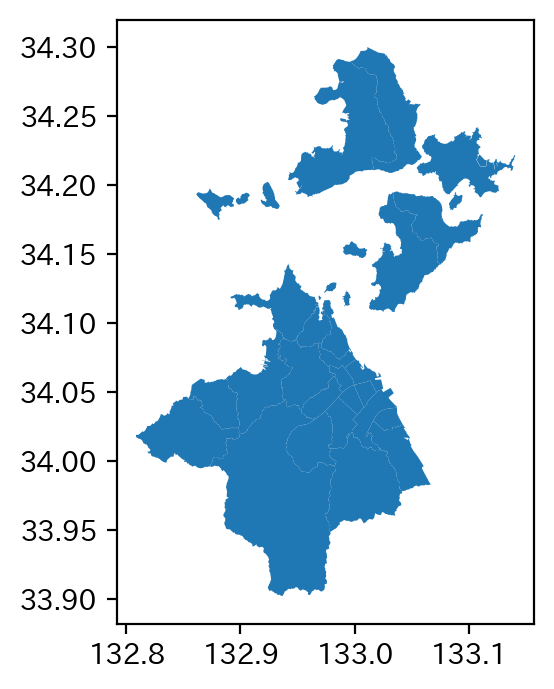

In [ ]:
imabari.plot()

In [ ]:
df0 = pd.read_html("https://www.city.imabari.ehime.jp/gakukyou/shogakkou.html", index_col=0)[0].fillna(0).astype(str)

In [ ]:
df1 = df0.applymap(lambda s: s.replace("人", "").replace(",", ""))

In [ ]:
df1 = df1.astype(int).drop("合計")

In [ ]:
df1

,1年,2年,3年,4年,5年,6年,計
学校名,,,,,,,
吹揚小学校,52,68,60,66,76,66,388
別宮小学校,39,34,50,38,35,33,229
常盤小学校,75,87,90,92,79,84,507
近見小学校,37,48,51,60,47,59,302
立花小学校,63,68,86,88,88,88,481
鳥生小学校,61,76,70,76,76,82,441
桜井小学校,54,60,56,69,67,72,378
国分小学校,31,31,36,46,48,33,225
富田小学校,88,93,102,111,100,112,606


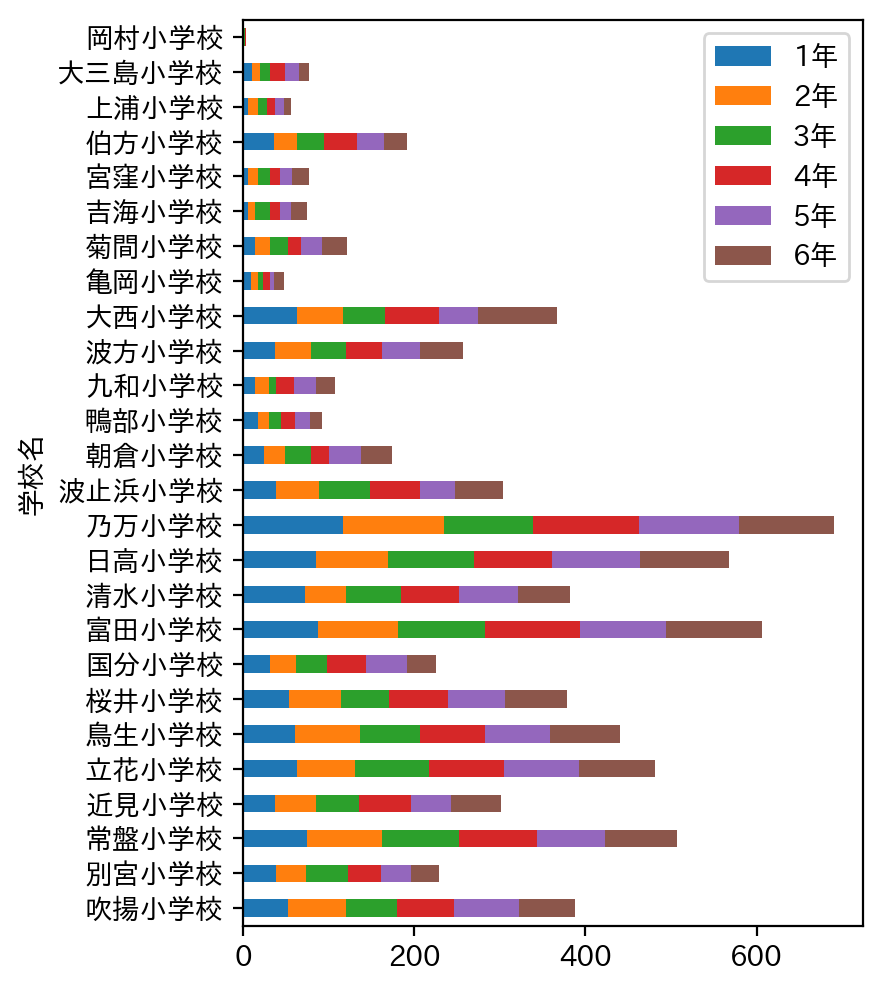

In [ ]:
df1.iloc[:, :6].plot.barh(stacked=True, figsize=(4, 6))
plt.savefig("01.png", dpi=200, bbox_inches="tight")
plt.show()

In [ ]:
df2 = pd.read_csv("https://www.city.imabari.ehime.jp/opendata/data/school.csv", encoding="cp932", dtype={"電話番号": str})

In [ ]:
df3 = df2[df2["施設名"].str.endswith("小学校")].copy()

In [ ]:
df3["施設名"] = df3["施設名"].str.replace("今治市立", "")

In [ ]:
df3.set_index("施設名", inplace=True)

In [ ]:
pt_df = gpd.GeoDataFrame(df3, geometry = gpd.points_from_xy(df3["経度"], df3["緯度"]), crs="EPSG:6668")

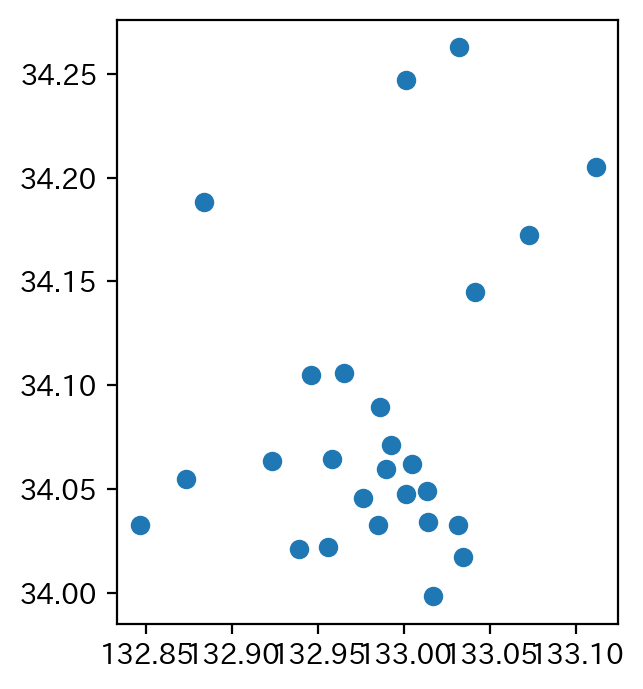

In [ ]:
pt_df.plot()

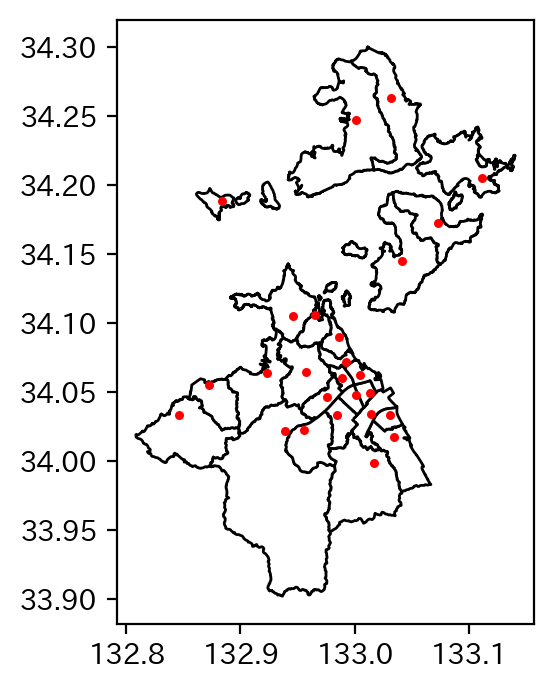

In [ ]:
base = imabari.plot(color="white", edgecolor="black")
pt_df.plot(ax=base, marker="o", color="red", markersize=5);

In [ ]:
school = pd.merge(imabari, df1, on="学校名")
school

,学校名,住所,geometry,1年,2年,3年,4年,5年,6年,計
0,伯方小学校,今治市伯方町木浦甲3599-2,"MULTIPOLYGON (((133.12441 34.19971, 133.12444 ...",36,27,32,38,32,27,192
1,吉海小学校,今治市吉海町八幡157,"MULTIPOLYGON (((133.01876 34.13892, 133.01844 ...",6,8,17,12,13,19,75
2,宮窪小学校,今治市宮窪町宮窪4765,"MULTIPOLYGON (((133.09607 34.17360, 133.09620 ...",6,12,13,12,14,20,77
3,岡村小学校,今治市関前岡村甲415,"MULTIPOLYGON (((132.87806 34.17759, 132.87807 ...",0,1,1,1,0,0,3
4,波止浜小学校,今治市地堀1-3-40,"MULTIPOLYGON (((132.99296 34.12268, 132.99294 ...",39,50,59,59,41,56,304
5,近見小学校,今治市近見町1-5-1,"POLYGON ((132.97622 34.11637, 132.97624 34.116...",37,48,51,60,47,59,302
6,上浦小学校,今治市上浦町井口4497-1,"POLYGON ((133.01111 34.29969, 133.01115 34.299...",6,11,11,9,11,8,56
7,大三島小学校,今治市大三島町宮浦5145,"POLYGON ((132.96435 34.19289, 132.96429 34.192...",10,10,11,18,16,12,77
8,大西小学校,今治市大西町大井浜103,"POLYGON ((132.93002 34.09520, 132.93000 34.095...",63,54,49,63,46,92,367
9,菊間小学校,今治市菊間町長坂2000-1,"POLYGON ((132.84932 34.04446, 132.84986 34.046...",14,17,21,16,24,29,121


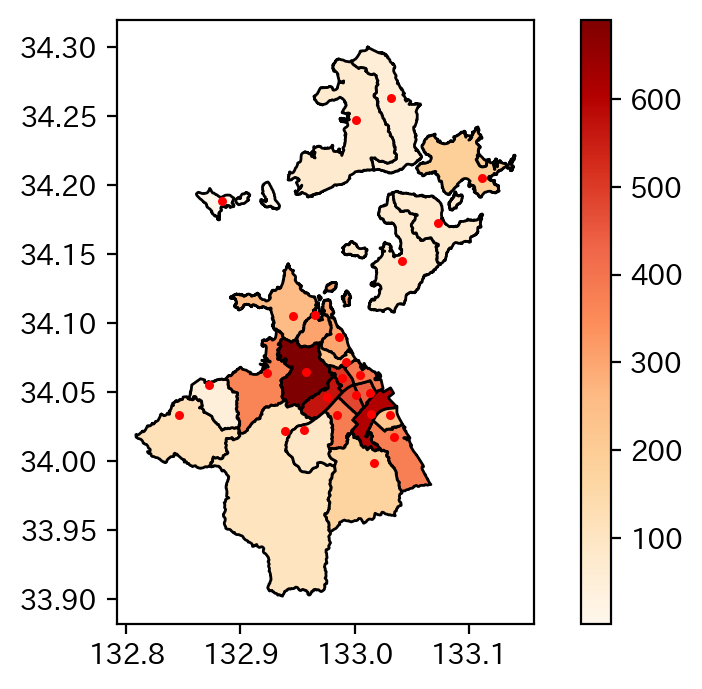

In [ ]:
base = school.plot(column="計", cmap='OrRd', edgecolor="black", legend=True)
pt_df.plot(ax=base, marker="o", color="red", markersize=5);

# グラフを保存
plt.savefig('02.png', dpi=200, bbox_inches="tight")
plt.show()

In [ ]:
df3

,所在地,電話番号,緯度,経度,geometry
施設名,,,,,
吹揚小学校,今治市黄金町三丁目3番地,0898220689,34.062174,133.004632,POINT (133.00463 34.06217)
別宮小学校,今治市別宮町五丁目1番地7,0898320688,34.071325,132.992401,POINT (132.99240 34.07133)
常盤小学校,今治市中日吉町二丁目6番55号,0898220477,34.059801,132.989257,POINT (132.98926 34.05980)
近見小学校,今治市近見町一丁目5番1号,0898220258,34.089579,132.986088,POINT (132.98609 34.08958)
立花小学校,今治市立花町四丁目3番45号,0898220185,34.047734,133.001053,POINT (133.00105 34.04773)
鳥生小学校,今治市南高下町三丁目3番71号,0898331221,34.048912,133.013260,POINT (133.01326 34.04891)
桜井小学校,今治市郷桜井一丁目8番26号,0898480217,34.017379,133.034048,POINT (133.03405 34.01738)
国分小学校,今治市古国分二丁目7番1号,0898472050,34.032933,133.031261,POINT (133.03126 34.03293)
富田小学校,今治市上徳甲394番地4,0898486169,34.034117,133.013897,POINT (133.01390 34.03412)


In [ ]:
district = school.set_index("学校名", drop=True)

In [ ]:
district = district.to_crs(epsg=6674)

In [ ]:
district["area"] = district.area

In [ ]:
district

,住所,geometry,1年,2年,3年,4年,5年,6年,計,district,area
学校名,,,,,,,,,,,
伯方小学校,今治市伯方町木浦甲3599-2,"MULTIPOLYGON (((-265052.426 -195968.596, -2650...",36,27,32,38,32,27,192,2.071123e+07,2.071123e+07
吉海小学校,今治市吉海町八幡157,"MULTIPOLYGON (((-274990.738 -202433.499, -2750...",6,8,17,12,13,19,75,2.737331e+07,2.737331e+07
宮窪小学校,今治市宮窪町宮窪4765,"MULTIPOLYGON (((-267747.835 -198791.714, -2677...",6,12,13,12,14,20,77,1.670060e+07,1.670060e+07
岡村小学校,今治市関前岡村甲415,"MULTIPOLYGON (((-287842.226 -197753.762, -2878...",0,1,1,1,0,0,3,5.479860e+06,5.479860e+06
波止浜小学校,今治市地堀1-3-40,"MULTIPOLYGON (((-277424.104 -204165.904, -2774...",39,50,59,59,41,56,304,6.237277e+06,6.237277e+06
近見小学校,今治市近見町1-5-1,"POLYGON ((-278990.625 -204820.564, -278988.153...",37,48,51,60,47,59,302,4.874935e+06,4.874935e+06
上浦小学校,今治市上浦町井口4497-1,"POLYGON ((-275172.482 -184572.129, -275169.209...",6,11,11,9,11,8,56,2.233055e+07,2.233055e+07
大三島小学校,今治市大三島町宮浦5145,"POLYGON ((-279833.367 -196296.348, -279838.656...",10,10,11,18,16,12,77,4.214176e+07,4.214176e+07
大西小学校,今治市大西町大井浜103,"POLYGON ((-283325.449 -207042.552, -283327.256...",63,54,49,63,46,92,367,1.863270e+07,1.863270e+07


In [ ]:
se = district["area"] / district["計"]

In [ ]:
se.astype(int).sort_values()

学校名
常盤小学校        4328
鳥生小学校        4703
立花小学校        5180
日高小学校        9131
吹揚小学校        9308
富田小学校       11625
別宮小学校       12140
国分小学校       12388
近見小学校       16142
清水小学校       16432
波止浜小学校      20517
乃万小学校       22713
桜井小学校       33665
大西小学校       50770
波方小学校       60474
伯方小学校      107870
鴨部小学校      136498
朝倉小学校      179632
宮窪小学校      216890
亀岡小学校      218011
菊間小学校      218862
吉海小学校      364977
上浦小学校      398759
大三島小学校     547295
九和小学校      847661
岡村小学校     1826620
dtype: int64

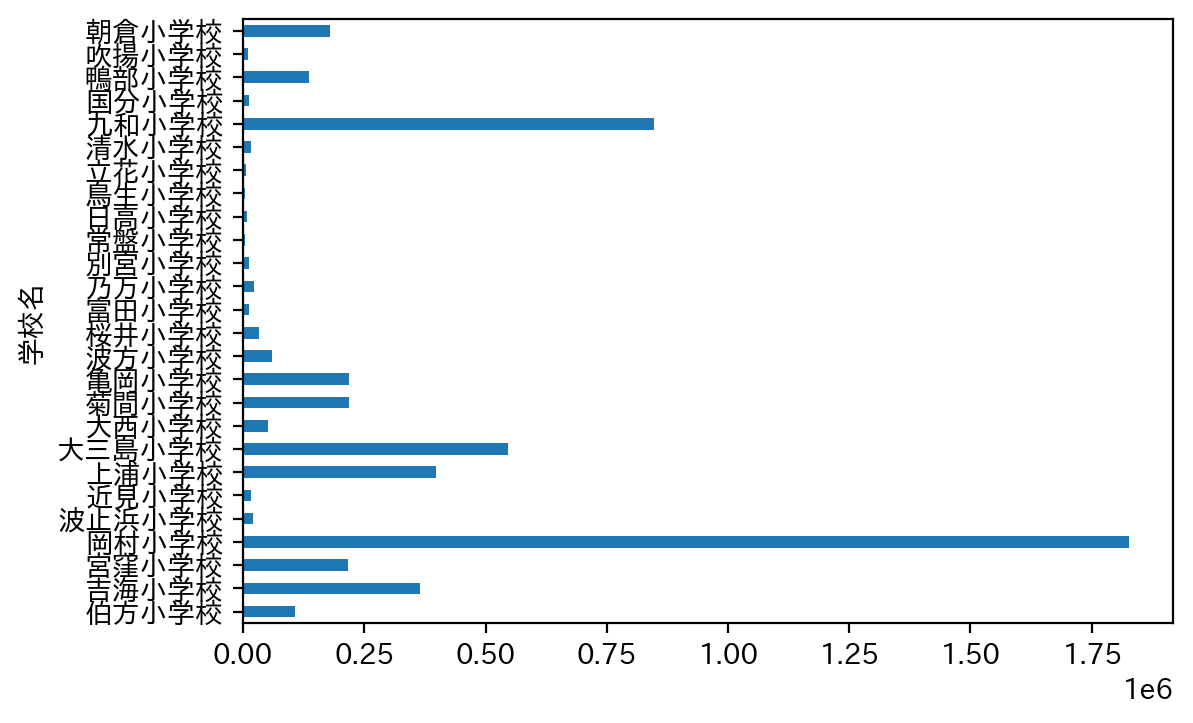

In [ ]:
se.plot.barh()

# グラフを保存
plt.savefig('03.png', dpi=200, bbox_inches="tight")
plt.show()